In [49]:
import common as cm
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from itertools import product


ModuleNotFoundError: No module named 'geopandas'

In [6]:
df = cm.load_data()
df.head(10)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326


In [54]:
df1 = df.copy()
df1["Affect"] = df1["Positive affect"] - df1["Negative affect"]
df1.drop(columns = ["Positive affect", "Negative affect"], inplace = True)
colonnes = ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect', 'Negative affect']
for col in colonnes:
    cm.normalize_avec_zero(df1,col)

df1.head(2)


AttributeError: module 'common' has no attribute 'normaliz_avec_zero'

In [8]:
def histogram(serie:pd.Series,nbins:int):
    plt.hist(serie,bins=nbins)
    plt.show()

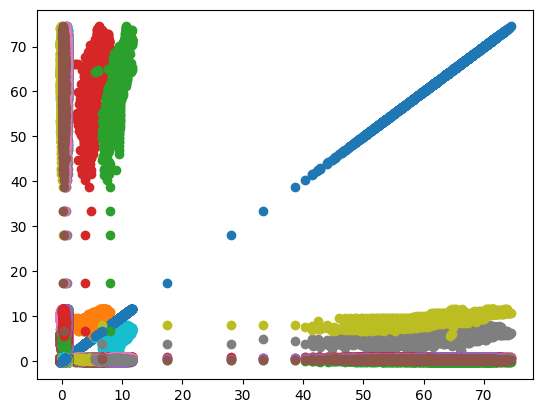

In [44]:
def correlation_plot(xdata,ydata,xlabel,ylabel,plot_kwargs):
    plt.plot(xdata,ydata,**plot_kwargs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    #plot_kwargs={'marker': 'x', 'color': 'red'}


for col1,col2 in product(colonnes,colonnes):
    plt.scatter(df[col1],df[col2])

In [48]:

world = gpd.read_file('map data/ne_110m_admin_0_countries.shp')
merged = world.set_index('SOVEREIGNT').join(df1.set_index('Country name'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='Joy', ax=ax, legend=True,
            legend_kwds={'label': "Bonheur",
                         'orientation': "horizontal"},
            cmap='coolwarm')

plt.title('World Happiness Index by Country')
plt.show()

NameError: name 'gpd' is not defined